# Pooling

Much like any convolutional layer, consists of a fixed-length window which slides over its input, performing an operation at every location determined by its size and stride. However, there is no kernel to be learned in a pooling operation, the output is instead deterministic. 

Typically, pooling computes either the average or the maximum of the inputs in the pooling window. (max-pooling and average pooling). Average pooling has been around for soem time, and is essentially a way of downsampling an image while obtaining a good signal to noise ratio by averaging every second/third/fourth pixel. However, in almost all cases, max pooling is better than average pooling. 

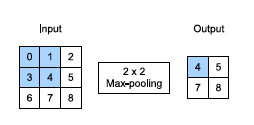
^ max pooling

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [1]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[0] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [4]:
# to verify the image
X = torch.tensor(
    [
        [0.0, 1.0, 2.0],
        [3.0, 4.0, 5.0],
        [6.0, 7.0, 8.0]
    ]
)

pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

## Padding and Stride

As with other convolutional layers, we can adjust the output of the convolutional layer using padding and stride, to achieve an output with the dimensionality that we desire. 

In [6]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [9]:
# Defaults to matching pooling window and sizes, since they are intented to pool information from an area of the input
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [10]:
# but of course we can override this
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## Multiple Channels

The pooling operation pools each input channel seperately. So the number of input channels and output channels is the same.

In [11]:
X = torch.cat((X, X+1))

pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]],


        [[[ 6.,  8.],
          [14., 16.]]]])

Of course, there are many other types of pooling operations, such as stochastic pooling, which incorporates a degree of randomness. The _attention_ mechanism (:O) is a more refined way of aggregating over outputs. 